In [186]:
!pip install yfinance
import yfinance as yf
#date till :- 15/02/22
#data_sensex = yf.download("^BSESN")
#data_nifty = yf.download("^NSEI")
#data_tata = yf.download("TTM")
#data_infosys = yf.download("INFY")

In [187]:
#data_sensex.to_csv('sensex.csv')
#data_nifty.to_csv('nifty.csv')
#data_tata.to_csv('tata.csv')
#data_infosys.to_csv('infosys.csv')

In [188]:
import pandas as pd
df_sensex = pd.read_csv('sensex.csv')
print(df_sensex)

            Date          Open          High           Low         Close  \
0     1997-07-01   4263.109863   4301.770020   4247.660156   4300.859863   
1     1997-07-02   4302.959961   4395.310059   4295.399902   4333.899902   
2     1997-07-03   4335.790039   4393.290039   4299.970215   4323.459961   
3     1997-07-04   4332.700195   4347.589844   4300.580078   4323.819824   
4     1997-07-07   4326.810059   4391.009766   4289.490234   4291.450195   
...          ...           ...           ...           ...           ...   
6061  2022-02-08  57799.671875  57925.820312  57058.769531  57808.578125   
6062  2022-02-09  58163.011719  58507.609375  58105.179688  58465.968750   
6063  2022-02-10  58810.531250  59060.238281  58332.281250  58926.031250   
6064  2022-02-11  58447.148438  58447.148438  57914.101562  58152.921875   
6065  2022-02-14  56720.320312  57191.910156  56295.699219  56405.839844   

         Adj Close  Volume  
0      4300.859863       0  
1      4333.899902       0  


In [189]:
df_seas = df_sensex.copy()
df_seas.drop(['Open', 'High','Low','Adj Close','Volume'], axis = 1,inplace=True)
# df_seas.drop(df_seas.drop(df_seas.columns[[1,2,3,5,6]], axis = 1, inplace = True))
df_seas['Date']=pd.to_datetime(df_seas['Date'],infer_datetime_format=True)
df_seas=df_seas.set_index(['Date']).asfreq('D')
# df_seas.interpolate(method ='linear', limit_direction ='forward')
# # df_seas['Close'].fillna(method='ffill').fillna(method='bfill')
# # df_seas = df_seas.dropna()
df_seas.head(10)

,Close
Date,
1997-07-01,4300.859863
1997-07-02,4333.899902
1997-07-03,4323.459961
1997-07-04,4323.819824
1997-07-05,NaN
1997-07-06,NaN
1997-07-07,4291.450195
1997-07-08,4306.390137
1997-07-09,4404.689941


In [190]:
df_seas=df_seas.interpolate(method ='linear', limit_direction ='forward')
# df_seas.fillna(method='pad')
# df_seas = df_seas.dropna()
df_seas.head(10)

,Close
Date,
1997-07-01,4300.859863
1997-07-02,4333.899902
1997-07-03,4323.459961
1997-07-04,4323.819824
1997-07-05,4313.029948
1997-07-06,4302.240072
1997-07-07,4291.450195
1997-07-08,4306.390137
1997-07-09,4404.689941


In [191]:
df_seas.describe()

,Close
count,8995.000000
mean,18190.110812
std,13848.020800
min,2600.120117
25%,4934.512451
50%,16752.859375
75%,27252.984375
max,61765.589844


In [192]:
df_sensex_heat = df_sensex.copy()
df_sensex_heat.drop("Date", axis=1, inplace=True)
df_sensex_heat

,Open,High,Low,Close,Adj Close,Volume
0,4263.109863,4301.770020,4247.660156,4300.859863,4300.859863,0
1,4302.959961,4395.310059,4295.399902,4333.899902,4333.899902,0
2,4335.790039,4393.290039,4299.970215,4323.459961,4323.459961,0
3,4332.700195,4347.589844,4300.580078,4323.819824,4323.819824,0
4,4326.810059,4391.009766,4289.490234,4291.450195,4291.450195,0
...,...,...,...,...,...,...
6061,57799.671875,57925.820312,57058.769531,57808.578125,57808.578125,8900
6062,58163.011719,58507.609375,58105.179688,58465.968750,58465.968750,5900
6063,58810.531250,59060.238281,58332.281250,58926.031250,58926.031250,6700
6064,58447.148438,58447.148438,57914.101562,58152.921875,58152.921875,5700


In [193]:
df_nifty = pd.read_csv('nifty.csv')
#print(df_nifty)

In [194]:
df_tata = pd.read_csv('tata.csv')
#print(df_tata)

In [195]:
df_infosys = pd.read_csv('infosys.csv')
#print(df_infosys)

In [196]:
df1=df_seas.reset_index()['Close']
df2=df_nifty.reset_index()['Close']
df3=df_tata.reset_index()['Close']
df4=df_infosys.reset_index()['Close']

In [197]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(8995,)
(3529,)
(4378,)
(5772,)


In [198]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

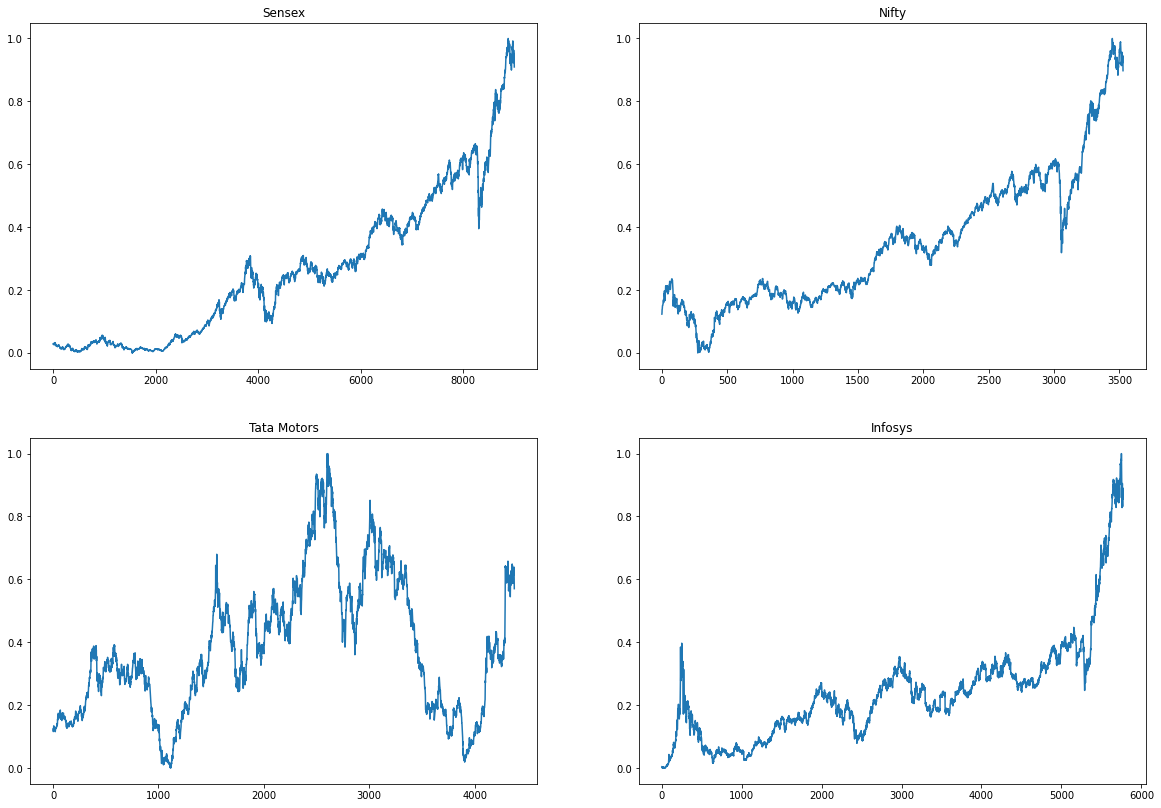

In [199]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(2,2,figsize=(20,14))
axs[0,0].set_title('Sensex')
axs[0,0].plot(df1)
axs[0,1].set_title('Nifty')
axs[0,1].plot(df2)
axs[1,0].set_title('Tata Motors')
axs[1,0].plot(df3)
axs[1,1].set_title('Infosys')
axs[1,1].plot(df4)

In [200]:
!pip install seaborn

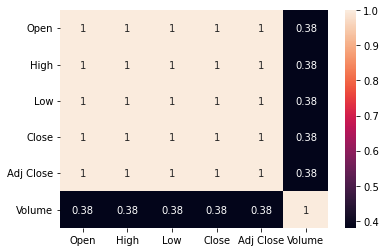

In [201]:
import seaborn as sns
corr = df_sensex_heat.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

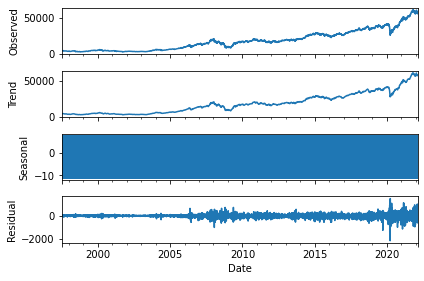

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_seas,model="additive")
decompose_data.plot();

In [203]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [204]:
split=0.8
time_step=10
ep_vanilla=50
ep_lstm=50
ep_bi_lstm=50
look_back=time_step
days=7

In [205]:
# split=0.95
training_size_sensex=int(len(df1)*split)
test_size_sensex=len(df1)-training_size_sensex
train_data_sensex,test_data_sensex=df1[0:training_size_sensex,:],df1[training_size_sensex:len(df1),:1]

# time_step = 14
X_train_sensex, y_train_sensex = create_dataset(train_data_sensex, time_step)
X_test_sensex, ytest_sensex = create_dataset(test_data_sensex, time_step)

X_train_sensex =X_train_sensex.reshape(X_train_sensex.shape[0],X_train_sensex.shape[1] , 1)
X_test_sensex = X_test_sensex.reshape(X_test_sensex.shape[0],X_test_sensex.shape[1] , 1)

In [206]:

training_size_nifty=int(len(df2)*split)
test_size_nifty=len(df2)-training_size_nifty
train_data_nifty,test_data_nifty=df2[0:training_size_nifty,:],df2[training_size_nifty:len(df2),:1]

# time_step = 14
X_train_nifty, y_train_nifty = create_dataset(train_data_nifty, time_step)
X_test_nifty, ytest_nifty = create_dataset(test_data_nifty, time_step)

X_train_nifty =X_train_nifty.reshape(X_train_nifty.shape[0],X_train_nifty.shape[1] , 1)
X_test_nifty = X_test_nifty.reshape(X_test_nifty.shape[0],X_test_nifty.shape[1] , 1)

In [207]:
training_size_tata=int(len(df3)*split)
test_size_tata=len(df3)-training_size_tata
train_data_tata,test_data_tata=df3[0:training_size_tata,:],df3[training_size_tata:len(df3),:1]

# time_step = 14
X_train_tata, y_train_tata = create_dataset(train_data_tata, time_step)
X_test_tata, ytest_tata = create_dataset(test_data_tata, time_step)

X_train_tata =X_train_tata.reshape(X_train_tata.shape[0],X_train_tata.shape[1] , 1)
X_test_tata = X_test_tata.reshape(X_test_tata.shape[0],X_test_tata.shape[1] , 1)

In [208]:
training_size_infosys=int(len(df4)*split)
test_size_infosys=len(df4)-training_size_infosys
train_data_infosys,test_data_infosys=df4[0:training_size_infosys,:],df4[training_size_infosys:len(df4),:1]

# time_step = 14
X_train_infosys, y_train_infosys = create_dataset(train_data_infosys, time_step)
X_test_infosys, ytest_infosys = create_dataset(test_data_infosys, time_step)

X_train_infosys =X_train_infosys.reshape(X_train_infosys.shape[0],X_train_infosys.shape[1] , 1)
X_test_infosys = X_test_infosys.reshape(X_test_infosys.shape[0],X_test_infosys.shape[1] , 1)

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional,Dropout

## **VANILLA LSTM**

In [210]:
# Vanilla LSTM
model_vanilla = Sequential()
model_vanilla.add(LSTM(100, activation='relu', input_shape=(time_step,1)))
model_vanilla.add(Dense(1))
model_vanilla.compile(optimizer='adam', loss='mse')
model_vanilla.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 100)               40800     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [211]:
history_vanilla = model_vanilla.fit(X_train_sensex, y_train_sensex,batch_size=64,epochs=ep_vanilla,validation_data=[X_test_sensex, ytest_sensex],verbose=1)

Epoch 1/50
113/113 [==============================] - 3s 17ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 2/50
113/113 [==============================] - 2s 14ms/step - loss: 2.5863e-05 - val_loss: 0.0028
Epoch 3/50
113/113 [==============================] - 2s 15ms/step - loss: 2.4691e-05 - val_loss: 0.0023
Epoch 4/50
113/113 [==============================] - 2s 14ms/step - loss: 2.4634e-05 - val_loss: 0.0025
Epoch 5/50
113/113 [==============================] - 2s 14ms/step - loss: 2.5012e-05 - val_loss: 0.0019
Epoch 6/50
113/113 [==============================] - 2s 14ms/step - loss: 2.5739e-05 - val_loss: 0.0021
Epoch 7/50
113/113 [==============================] - 2s 14ms/step - loss: 2.5009e-05 - val_loss: 0.0013
Epoch 8/50
113/113 [==============================] - 2s 15ms/step - loss: 2.4620e-05 - val_loss: 0.0018
Epoch 9/50
113/113 [==============================] - 2s 15ms/step - loss: 2.3156e-05 - val_loss: 0.0012
Epoch 10/50
113/113 [==============================] - 2s 1

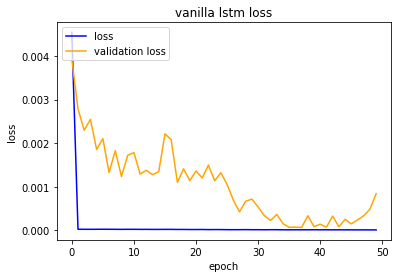

In [212]:
plt.plot(history_vanilla.history['loss'],color='blue')
plt.plot(history_vanilla.history['val_loss'],color='orange')
plt.title('vanilla lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["loss","validation loss"], loc ="upper left")
# plt.legend(['accuracy'])

In [241]:
train_predict_sensex=model_vanilla.predict(X_train_sensex)
test_predict_sensex=model_vanilla.predict(X_test_sensex)
train_predict_sensex=scaler.inverse_transform(train_predict_sensex)
test_predict_sensex=scaler.inverse_transform(test_predict_sensex)

import math
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
rmse_vanilla = math.sqrt(mean_squared_error(y_train_sensex,train_predict_sensex))
mape_vanilla = mean_absolute_percentage_error(ytest_sensex,test_predict_sensex)
accuracy_vanilla = 100 - mape_vanilla
print("Train MSE:-")
print(math.sqrt(mean_squared_error(y_train_sensex,train_predict_sensex)))
#print(np.sqrt(np.mean(np.square(((y_train_sensex-train_predict_sensex) / y_train_sensex)), axis=0)))
print("Test MSE:-")
print(math.sqrt(mean_squared_error(ytest_sensex,test_predict_sensex)))
print("MAPE:- ")
print(mean_absolute_percentage_error(ytest_sensex,test_predict_sensex))

Train MSE:-
5.885800762087282
Test MSE:-
16.096868630201946
MAPE:- 
24.988094467914625


# **BI DIRECTIONAL LSTM**

In [214]:
# BiDirectional_LSTM
model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(30,return_sequences=True), input_shape=(time_step, 1)))
model_bi_lstm.add(Dropout(0.3))
model_bi_lstm.add(Bidirectional(LSTM(30,return_sequences=True)))
model_bi_lstm.add(Dropout(0.3))
model_bi_lstm.add(Bidirectional(LSTM(30)))
model_bi_lstm.add(Dropout(0.3))
model_bi_lstm.add(Dense(1, activation='sigmoid'))
model_bi_lstm.compile(loss='mean_squared_error',optimizer='adam')
model_bi_lstm.summary()
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_38 (Bidirecti  (None, 10, 60)           7680      
 onal)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 10, 60)            0         
                                                                 
 bidirectional_39 (Bidirecti  (None, 10, 60)           21840     
 onal)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 10, 60)            0         
                                                                 
 bidirectional_40 (Bidirecti  (None, 60)               21840     
 onal)                                                           
                                                     

In [215]:
history_bi_lstm = model_bi_lstm.fit(X_train_sensex, y_train_sensex,batch_size=64,epochs=ep_bi_lstm,validation_data=[X_test_sensex, ytest_sensex],verbose=1)

Epoch 1/50
113/113 [==============================] - 17s 63ms/step - loss: 0.0238 - val_loss: 0.0095
Epoch 2/50
113/113 [==============================] - 4s 33ms/step - loss: 6.2913e-04 - val_loss: 0.0319
Epoch 3/50
113/113 [==============================] - 4s 33ms/step - loss: 5.0574e-04 - val_loss: 0.0279
Epoch 4/50
113/113 [==============================] - 4s 33ms/step - loss: 4.5201e-04 - val_loss: 0.0246
Epoch 5/50
113/113 [==============================] - 4s 34ms/step - loss: 3.9215e-04 - val_loss: 0.0223
Epoch 6/50
113/113 [==============================] - 4s 33ms/step - loss: 3.7159e-04 - val_loss: 0.0187
Epoch 7/50
113/113 [==============================] - 4s 32ms/step - loss: 3.4302e-04 - val_loss: 0.0153
Epoch 8/50
113/113 [==============================] - 4s 32ms/step - loss: 3.0491e-04 - val_loss: 0.0113
Epoch 9/50
113/113 [==============================] - 4s 32ms/step - loss: 2.9073e-04 - val_loss: 0.0084
Epoch 10/50
113/113 [==============================] - 4s 

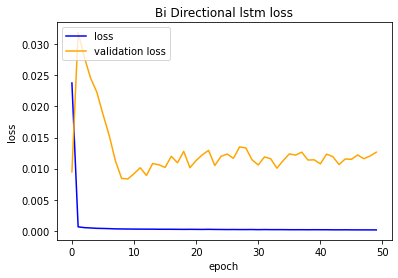

In [216]:
plt.plot(history_bi_lstm.history['loss'],color='blue')
plt.plot(history_bi_lstm.history['val_loss'],color='orange')
plt.title('Bi Directional lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["loss","validation loss"], loc ="upper left")
# plt.legend(['accuracy'])

In [243]:
train_predict_sensex=model_bi_lstm.predict(X_train_sensex)
test_predict_sensex=model_bi_lstm.predict(X_test_sensex)
train_predict_sensex=scaler.inverse_transform(train_predict_sensex)
test_predict_sensex=scaler.inverse_transform(test_predict_sensex)

import math
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
rmse_bilstm = math.sqrt(mean_squared_error(y_train_sensex,train_predict_sensex))
mape_bilstm = mean_absolute_percentage_error(ytest_sensex,test_predict_sensex)
accuracy_bilstm = 100 - mape_bilstm
print("Train MSE:-")
print(math.sqrt(mean_squared_error(y_train_sensex,train_predict_sensex)))
#print(np.sqrt(np.mean(np.square(((y_train_sensex-train_predict_sensex) / y_train_sensex)), axis=0)))
print("Test MSE:-")
print(math.sqrt(mean_squared_error(ytest_sensex,test_predict_sensex)))
print("MAPE:- ")
print(mean_absolute_percentage_error(ytest_sensex,test_predict_sensex))

Train MSE:-
5.960014708282663
Test MSE:-
14.36570219370019
MAPE:- 
22.976173953088466


# **STACKED LSTM**

In [218]:
# LSTM_Model
model_lstm=Sequential()
model_lstm.add(LSTM(100,return_sequences=True,input_shape=(time_step,1)))
model_lstm.add(LSTM(50,return_sequences=True))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error',optimizer='adam')
model_lstm.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_65 (LSTM)              (None, 10, 50)            30200     
                                                                 
 lstm_66 (LSTM)              (None, 50)                20200     
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
_________________________________________________________________


In [219]:
history_lstm= model_lstm.fit(X_train_sensex,y_train_sensex,validation_data=(X_test_sensex,ytest_sensex),epochs=ep_lstm,batch_size=64,verbose=1)

Epoch 1/50
113/113 [==============================] - 10s 42ms/step - loss: 0.0026 - val_loss: 3.4233e-04
Epoch 2/50
113/113 [==============================] - 3s 31ms/step - loss: 3.9887e-05 - val_loss: 9.3735e-04
Epoch 3/50
113/113 [==============================] - 3s 31ms/step - loss: 4.2372e-05 - val_loss: 0.0013
Epoch 4/50
113/113 [==============================] - 3s 31ms/step - loss: 4.0441e-05 - val_loss: 0.0014
Epoch 5/50
113/113 [==============================] - 4s 31ms/step - loss: 4.0498e-05 - val_loss: 7.6984e-04
Epoch 6/50
113/113 [==============================] - 3s 31ms/step - loss: 4.1174e-05 - val_loss: 0.0011
Epoch 7/50
113/113 [==============================] - 4s 31ms/step - loss: 4.2914e-05 - val_loss: 0.0010
Epoch 8/50
113/113 [==============================] - 3s 30ms/step - loss: 4.0663e-05 - val_loss: 9.6851e-04
Epoch 9/50
113/113 [==============================] - 3s 31ms/step - loss: 3.9937e-05 - val_loss: 6.6085e-04
Epoch 10/50
113/113 [=================

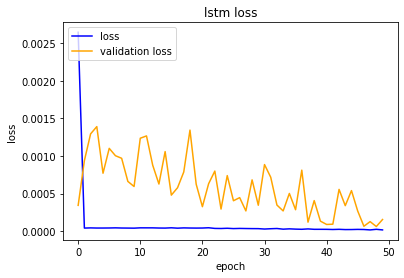

In [220]:
plt.plot(history_lstm.history['loss'],color='blue')
plt.plot(history_lstm.history['val_loss'],color='orange')
plt.title('lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["loss","validation loss"], loc ="upper left")
# plt.legend(['accuracy'])

In [244]:
train_predict_sensex=model_lstm.predict(X_train_sensex)
test_predict_sensex=model_lstm.predict(X_test_sensex)
train_predict_sensex=scaler.inverse_transform(train_predict_sensex)
test_predict_sensex=scaler.inverse_transform(test_predict_sensex)

import math
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
rmse_lstm = math.sqrt(mean_squared_error(y_train_sensex,train_predict_sensex))
mape_lstm = mean_absolute_percentage_error(ytest_sensex,test_predict_sensex)
accuracy_lstm = 100 - mape_lstm
print("Train MSE:-")
print(math.sqrt(mean_squared_error(y_train_sensex,train_predict_sensex)))
#print(np.sqrt(np.mean(np.square(((y_train_sensex-train_predict_sensex) / y_train_sensex)), axis=0)))
print("Test MSE:-")
print(math.sqrt(mean_squared_error(ytest_sensex,test_predict_sensex)))
print("MAPE:- ")
print(mean_absolute_percentage_error(ytest_sensex,test_predict_sensex))

Train MSE:-
5.949199961131695
Test MSE:-
16.298803418538068
MAPE:- 
25.173671673613214


In [222]:
model_lstm.fit(X_train_nifty,y_train_nifty,validation_data=(X_test_nifty,ytest_nifty),epochs=ep_lstm,batch_size=64,verbose=1)

Epoch 1/50
44/44 [==============================] - 1s 33ms/step - loss: 5.5582e-05 - val_loss: 2.2659e-04
Epoch 2/50
44/44 [==============================] - 2s 34ms/step - loss: 5.3981e-05 - val_loss: 1.7899e-04
Epoch 3/50
44/44 [==============================] - 1s 31ms/step - loss: 4.7110e-05 - val_loss: 1.5533e-04
Epoch 4/50
44/44 [==============================] - 1s 31ms/step - loss: 5.7122e-05 - val_loss: 3.8777e-04
Epoch 5/50
44/44 [==============================] - 1s 31ms/step - loss: 5.7190e-05 - val_loss: 1.3926e-04
Epoch 6/50
44/44 [==============================] - 1s 32ms/step - loss: 4.2035e-05 - val_loss: 1.3587e-04
Epoch 7/50
44/44 [==============================] - 1s 31ms/step - loss: 4.5500e-05 - val_loss: 1.6278e-04
Epoch 8/50
44/44 [==============================] - 1s 31ms/step - loss: 4.2023e-05 - val_loss: 1.3049e-04
Epoch 9/50
44/44 [==============================] - 1s 31ms/step - loss: 3.8960e-05 - val_loss: 1.3084e-04
Epoch 10/50
44/44 [==================

In [223]:
train_predict_nifty=model_lstm.predict(X_train_nifty)
test_predict_nifty=model_lstm.predict(X_test_nifty)
train_predict_nifty=scaler.inverse_transform(train_predict_nifty)
test_predict_nifty=scaler.inverse_transform(test_predict_nifty)

print("Train MSE:-")
print(math.sqrt(mean_squared_error(y_train_nifty,train_predict_nifty)))
print("Test MSE:-")
print(math.sqrt(mean_squared_error(ytest_nifty,test_predict_nifty)))

Train MSE:-
8.059901439457628
Test MSE:-
17.605863168925815


In [224]:
model_lstm.fit(X_train_tata,y_train_tata,validation_data=(X_test_tata,ytest_tata),epochs=ep_lstm,batch_size=64,verbose=1)

Epoch 1/50
55/55 [==============================] - 2s 33ms/step - loss: 4.1666e-04 - val_loss: 1.4082e-04
Epoch 2/50
55/55 [==============================] - 2s 31ms/step - loss: 1.8909e-04 - val_loss: 1.2445e-04
Epoch 3/50
55/55 [==============================] - 2s 31ms/step - loss: 1.6621e-04 - val_loss: 1.3402e-04
Epoch 4/50
55/55 [==============================] - 2s 31ms/step - loss: 1.7739e-04 - val_loss: 1.2831e-04
Epoch 5/50
55/55 [==============================] - 2s 31ms/step - loss: 1.5928e-04 - val_loss: 1.2146e-04
Epoch 6/50
55/55 [==============================] - 2s 31ms/step - loss: 1.6505e-04 - val_loss: 1.6481e-04
Epoch 7/50
55/55 [==============================] - 2s 33ms/step - loss: 1.6265e-04 - val_loss: 1.2211e-04
Epoch 8/50
55/55 [==============================] - 2s 32ms/step - loss: 1.6054e-04 - val_loss: 1.2293e-04
Epoch 9/50
55/55 [==============================] - 2s 31ms/step - loss: 1.4957e-04 - val_loss: 1.3116e-04
Epoch 10/50
55/55 [==================

In [225]:
train_predict_tata=model_lstm.predict(X_train_tata)
test_predict_tata=model_lstm.predict(X_test_tata)
train_predict_tata=scaler.inverse_transform(train_predict_tata)
test_predict_tata=scaler.inverse_transform(test_predict_tata)

print("Train MSE:-")
print(math.sqrt(mean_squared_error(y_train_tata,train_predict_tata)))
print("Test MSE:-")
print(math.sqrt(mean_squared_error(ytest_tata,test_predict_tata)))

Train MSE:-
12.144204397883197
Test MSE:-
7.753427745209557


In [226]:
model_lstm.fit(X_train_infosys,y_train_infosys,validation_data=(X_test_infosys,ytest_infosys),epochs=ep_lstm,batch_size=64,verbose=1)

Epoch 1/50
72/72 [==============================] - 2s 32ms/step - loss: 3.8183e-05 - val_loss: 9.6929e-05
Epoch 2/50
72/72 [==============================] - 2s 31ms/step - loss: 3.6548e-05 - val_loss: 1.0763e-04
Epoch 3/50
72/72 [==============================] - 2s 31ms/step - loss: 3.6304e-05 - val_loss: 1.0627e-04
Epoch 4/50
72/72 [==============================] - 2s 31ms/step - loss: 3.6951e-05 - val_loss: 1.0716e-04
Epoch 5/50
72/72 [==============================] - 2s 31ms/step - loss: 3.7120e-05 - val_loss: 1.1803e-04
Epoch 6/50
72/72 [==============================] - 2s 31ms/step - loss: 3.6375e-05 - val_loss: 1.1864e-04
Epoch 7/50
72/72 [==============================] - 2s 32ms/step - loss: 3.9759e-05 - val_loss: 1.2634e-04
Epoch 8/50
72/72 [==============================] - 2s 31ms/step - loss: 3.8453e-05 - val_loss: 1.2673e-04
Epoch 9/50
72/72 [==============================] - 2s 31ms/step - loss: 3.7087e-05 - val_loss: 1.5081e-04
Epoch 10/50
72/72 [==================

In [227]:
train_predict_infosys=model_lstm.predict(X_train_infosys)
test_predict_infosys=model_lstm.predict(X_test_infosys)
train_predict_infosys=scaler.inverse_transform(train_predict_infosys)
test_predict_infosys=scaler.inverse_transform(test_predict_infosys)

print("Train MSE:-")
print(math.sqrt(mean_squared_error(y_train_infosys,train_predict_infosys)))
print("Test MSE:-")
print(math.sqrt(mean_squared_error(ytest_infosys,test_predict_infosys)))

Train MSE:-
5.6278746910888495
Test MSE:-
13.106916166394004


In [248]:
from tabulate import tabulate
mydata = [
    ["Vanilla LSTM", rmse_vanilla, mape_vanilla, accuracy_vanilla],
    ["Bi Directional LSTM", rmse_bilstm, mape_bilstm, accuracy_bilstm],
    ["Stacked LSTM", rmse_lstm, mape_lstm, accuracy_lstm]
]
 
head = ["MODEL TYPE", "RMSE", "MAPE", "ACCURACY"]

print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------------+---------+---------+------------+
| MODEL TYPE          |    RMSE |    MAPE |   ACCURACY |
+=====================+=========+=========+============+
| Vanilla LSTM        | 5.8858  | 24.9881 |    75.0119 |
+---------------------+---------+---------+------------+
| Bi Directional LSTM | 5.96001 | 22.9762 |    77.0238 |
+---------------------+---------+---------+------------+
| Stacked LSTM        | 5.9492  | 25.1737 |    74.8263 |
+---------------------+---------+---------+------------+


# **OUTPUT VISUALISATION**

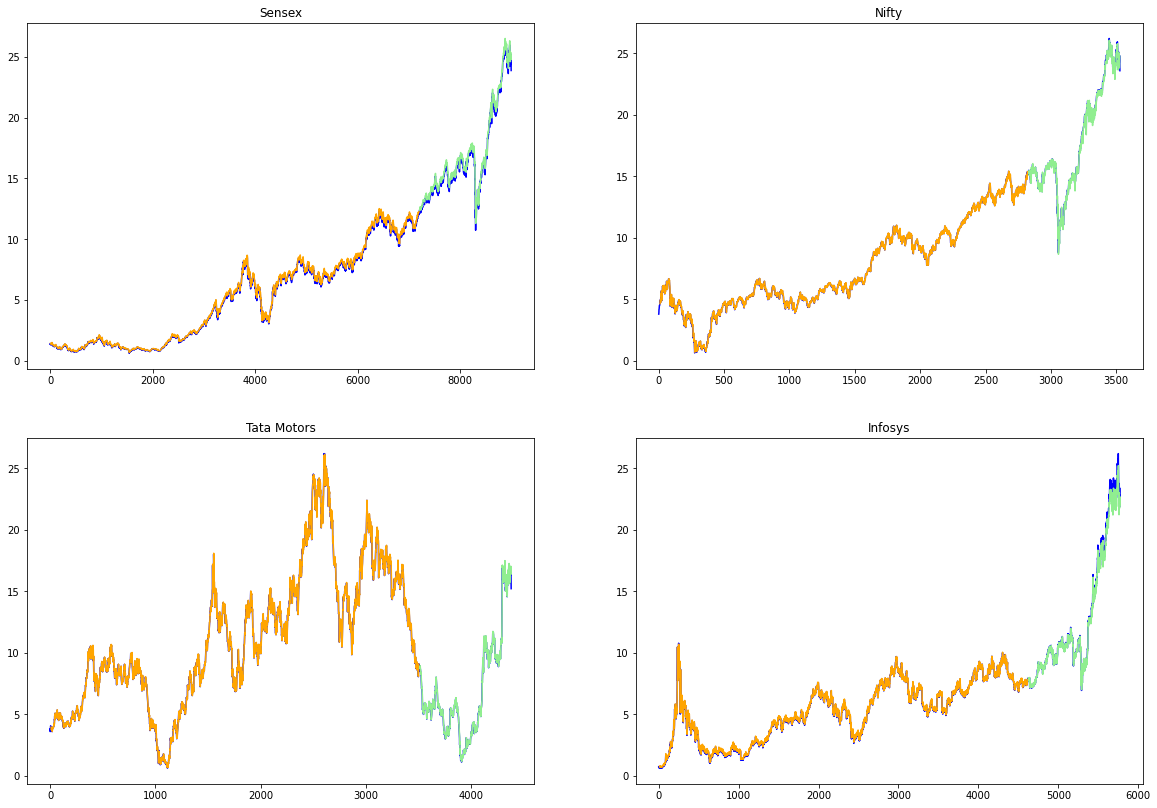

In [228]:
# look_back=14
f, axs = plt.subplots(2,2,figsize=(20,14))

trainPlot_sensex = np.empty_like(df1)
trainPlot_sensex[:,:]=np.nan
trainPlot_sensex[look_back:len(train_predict_sensex)+look_back,:]=train_predict_sensex
testPlot_sensex=np.empty_like(df1)
testPlot_sensex[:,:]=np.nan
testPlot_sensex[len(train_predict_sensex)+(look_back*2)+1:len(df1)-1,:]=test_predict_sensex
axs[0,0].set_title('Sensex')
axs[0,0].plot(scaler.inverse_transform(df1),color='blue')
axs[0,0].plot(trainPlot_sensex,color='orange')
axs[0,0].plot(testPlot_sensex,color='lightgreen')

trainPlot_nifty = np.empty_like(df2)
trainPlot_nifty[:,:]=np.nan
trainPlot_nifty[look_back:len(train_predict_nifty)+look_back,:]=train_predict_nifty
testPlot_nifty=np.empty_like(df2)
testPlot_nifty[:,:]=np.nan
testPlot_nifty[len(train_predict_nifty)+(look_back*2)+1:len(df2)-1,:]=test_predict_nifty
axs[0,1].set_title('Nifty')
axs[0,1].plot(scaler.inverse_transform(df2),color='blue')
axs[0,1].plot(trainPlot_nifty,color='orange')
axs[0,1].plot(testPlot_nifty,color='lightgreen')

trainPlot_tata = np.empty_like(df3)
trainPlot_tata[:,:]=np.nan
trainPlot_tata[look_back:len(train_predict_tata)+look_back,:]=train_predict_tata
testPlot_tata=np.empty_like(df3)
testPlot_tata[:,:]=np.nan
testPlot_tata[len(train_predict_tata)+(look_back*2)+1:len(df3)-1,:]=test_predict_tata
axs[1,0].set_title('Tata Motors')
axs[1,0].plot(scaler.inverse_transform(df3),color='blue')
axs[1,0].plot(trainPlot_tata,color='orange')
axs[1,0].plot(testPlot_tata,color='lightgreen')

trainPlot_infosys = np.empty_like(df4)
trainPlot_infosys[:,:]=np.nan
trainPlot_infosys[look_back:len(train_predict_infosys)+look_back,:]=train_predict_infosys
testPlot_infosys=np.empty_like(df4)
testPlot_infosys[:,:]=np.nan
testPlot_infosys[len(train_predict_infosys)+(look_back*2)+1:len(df4)-1,:]=test_predict_infosys
axs[1,1].set_title('Infosys')
axs[1,1].plot(scaler.inverse_transform(df4),color='blue')
axs[1,1].plot(trainPlot_infosys,color='orange')
axs[1,1].plot(testPlot_infosys,color='lightgreen')

In [229]:
#look_back=100
#trainPlot_nifty = np.empty_like(df2)
#trainPlot_nifty[:,:]=np.nan
#trainPlot_nifty[look_back:len(train_predict_nifty)+look_back,:]=train_predict_nifty
#testPlot_nifty=np.empty_like(df2)
#testPlot_nifty[:,:]=np.nan
#testPlot_nifty[len(train_predict_nifty)+(look_back*2)+1:len(df2)-1,:]=test_predict_nifty
#plt.plot(scaler.inverse_transform(df2),color='blue')
#plt.plot(trainPlot_nifty,color='orange')
#plt.plot(testPlot_nifty,color='lightgreen')
#plt.show()

In [230]:
# needs change
# days=7
x=len(test_data_sensex)

x_input=test_data_sensex[x-look_back:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

# from numpy import array

lst_output=[]
n_steps=look_back
i=0
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

(1, 10)
[0.8797566]
11
1 day input [0.93571945 0.92995241 0.93311958 0.94423063 0.95200649 0.93893959
 0.92909667 0.91925376 0.90941084 0.87975663]
1 day output [[0.8511765]]
2 day input [0.92995241 0.93311958 0.94423063 0.95200649 0.93893959 0.92909667
 0.91925376 0.90941084 0.87975663 0.8511765 ]
2 day output [[0.8276482]]
3 day input [0.93311958 0.94423063 0.95200649 0.93893959 0.92909667 0.91925376
 0.90941084 0.87975663 0.8511765  0.82764822]
3 day output [[0.806893]]
4 day input [0.94423063 0.95200649 0.93893959 0.92909667 0.91925376 0.90941084
 0.87975663 0.8511765  0.82764822 0.80689299]
4 day output [[0.7881376]]
5 day input [0.95200649 0.93893959 0.92909667 0.91925376 0.90941084 0.87975663
 0.8511765  0.82764822 0.80689299 0.78813761]
5 day output [[0.77092654]]
6 day input [0.93893959 0.92909667 0.91925376 0.90941084 0.87975663 0.8511765
 0.82764822 0.80689299 0.78813761 0.77092654]
6 day output [[0.7549445]]
[[0.8797566294670105], [0.8511765003204346], [0.8276482224464417],

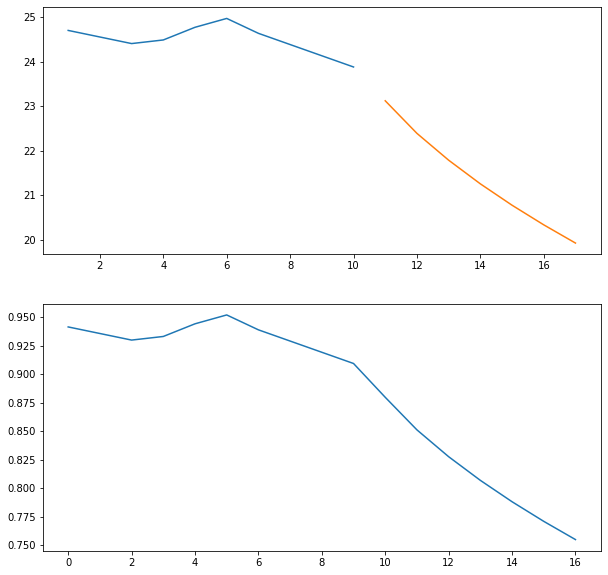

In [231]:
# needs change
day_new=np.arange(1,look_back+1)
day_pred=np.arange(look_back+1,look_back+days+1)
y=len(df1)

f, axs = plt.subplots(2,figsize=(10,10))

df_new=df1.tolist()
df_new.extend(lst_output)
axs[1].plot(df_new[y-look_back:])
# plt.plot(df_new[y-look_back:])

axs[0].plot(day_new,scaler.inverse_transform(df1[y-look_back:]))
axs[0].plot(day_pred,scaler.inverse_transform(lst_output))

In [232]:
# needs change
x=len(test_data_nifty)

x_input=test_data_nifty[x-look_back:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

# from numpy import array

lst_output=[]
n_steps=look_back
i=0
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

(1, 10)
[0.86680615]
11
1 day input [0.95630557 0.94252742 0.93977565 0.92080092 0.92413263 0.93648471
 0.945389   0.93090258 0.8975575  0.86680615]
1 day output [[0.8414231]]
2 day input [0.94252742 0.93977565 0.92080092 0.92413263 0.93648471 0.945389
 0.93090258 0.8975575  0.86680615 0.84142309]
2 day output [[0.81922245]]
3 day input [0.93977565 0.92080092 0.92413263 0.93648471 0.945389   0.93090258
 0.8975575  0.86680615 0.84142309 0.81922245]
3 day output [[0.79930216]]
4 day input [0.92080092 0.92413263 0.93648471 0.945389   0.93090258 0.8975575
 0.86680615 0.84142309 0.81922245 0.79930216]
4 day output [[0.7811868]]
5 day input [0.92413263 0.93648471 0.945389   0.93090258 0.8975575  0.86680615
 0.84142309 0.81922245 0.79930216 0.78118682]
5 day output [[0.7645585]]
6 day input [0.93648471 0.945389   0.93090258 0.8975575  0.86680615 0.84142309
 0.81922245 0.79930216 0.78118682 0.76455849]
6 day output [[0.7491226]]
[[0.866806149482727], [0.8414230942726135], [0.8192224502563477],

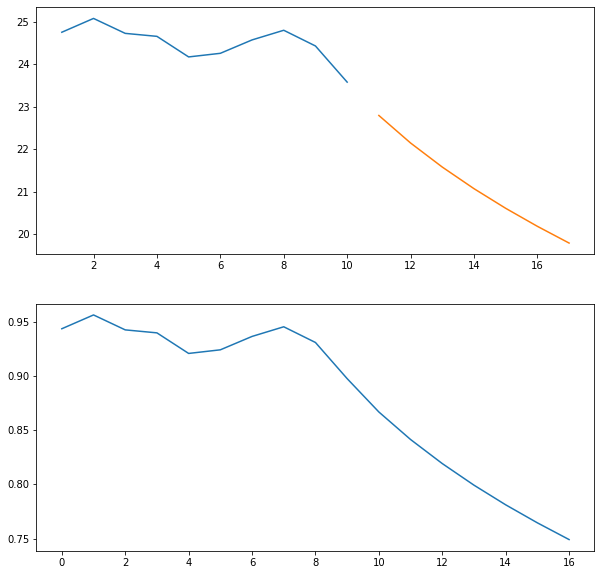

In [233]:
# needs change
day_new=np.arange(1,look_back+1)
day_pred=np.arange(look_back+1,look_back+days+1)
y=len(df2)

f, axs = plt.subplots(2,figsize=(10,10))

df_new=df2.tolist()
df_new.extend(lst_output)
axs[1].plot(df_new[y-look_back:])
# plt.plot(df_new[y-look_back:])

axs[0].plot(day_new,scaler.inverse_transform(df2[y-look_back:]))
axs[0].plot(day_pred,scaler.inverse_transform(lst_output))

In [234]:
# needs change
# days=7
x=len(test_data_tata)

x_input=test_data_tata[x-look_back:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

# from numpy import array

lst_output=[]
n_steps=look_back
i=0
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

(1, 10)
[0.5621576]
11
1 day input [0.63149181 0.62011173 0.61990477 0.61369746 0.61762882 0.63914749
 0.6252845  0.60128285 0.5704531  0.56215757]
1 day output [[0.557987]]
2 day input [0.62011173 0.61990477 0.61369746 0.61762882 0.63914749 0.6252845
 0.60128285 0.5704531  0.56215757 0.55798697]
2 day output [[0.55294985]]
3 day input [0.61990477 0.61369746 0.61762882 0.63914749 0.6252845  0.60128285
 0.5704531  0.56215757 0.55798697 0.55294985]
3 day output [[0.5479374]]
4 day input [0.61369746 0.61762882 0.63914749 0.6252845  0.60128285 0.5704531
 0.56215757 0.55798697 0.55294985 0.54793739]
4 day output [[0.543001]]
5 day input [0.61762882 0.63914749 0.6252845  0.60128285 0.5704531  0.56215757
 0.55798697 0.55294985 0.54793739 0.543001  ]
5 day output [[0.53814137]]
6 day input [0.63914749 0.6252845  0.60128285 0.5704531  0.56215757 0.55798697
 0.55294985 0.54793739 0.543001   0.53814137]
6 day output [[0.5333266]]
[[0.5621575713157654], [0.5579869747161865], [0.552949845790863], [

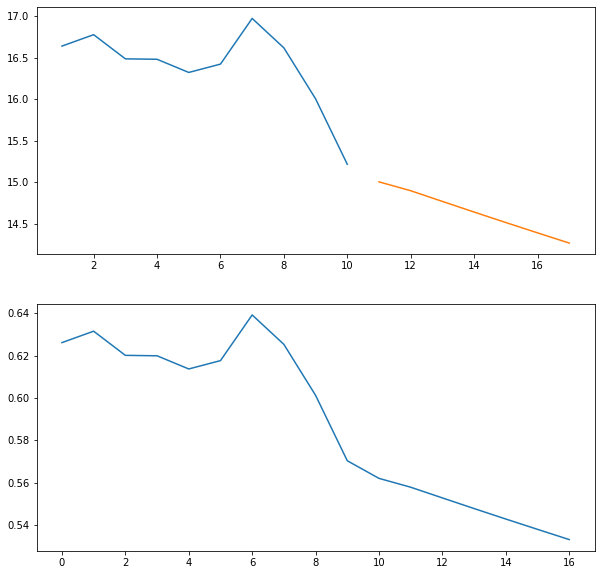

In [235]:
# needs change
day_new=np.arange(1,look_back+1)
day_pred=np.arange(look_back+1,look_back+days+1)
y=len(df3)

f, axs = plt.subplots(2,figsize=(10,10))

df_new=df3.tolist()
df_new.extend(lst_output)
axs[1].plot(df_new[y-look_back:])
# plt.plot(df_new[y-look_back:])

axs[0].plot(day_new,scaler.inverse_transform(df3[y-look_back:]))
axs[0].plot(day_pred,scaler.inverse_transform(lst_output))

In [236]:
# needs change
# days=7
x=len(test_data_infosys)

x_input=test_data_infosys[x-look_back:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

# from numpy import array

lst_output=[]
n_steps=look_back
i=0
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_lstm.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

(1, 10)
[0.81162894]
11
1 day input [0.90498533 0.86549363 0.87057669 0.8541544  0.87057669 0.89090906
 0.87253176 0.8463343  0.83343108 0.81162894]
1 day output [[0.7900072]]
2 day input [0.86549363 0.87057669 0.8541544  0.87057669 0.89090906 0.87253176
 0.8463343  0.83343108 0.81162894 0.79000717]
2 day output [[0.77134997]]
3 day input [0.87057669 0.8541544  0.87057669 0.89090906 0.87253176 0.8463343
 0.83343108 0.81162894 0.79000717 0.77134997]
3 day output [[0.7545713]]
4 day input [0.8541544  0.87057669 0.89090906 0.87253176 0.8463343  0.83343108
 0.81162894 0.79000717 0.77134997 0.75457132]
4 day output [[0.73922706]]
5 day input [0.87057669 0.89090906 0.87253176 0.8463343  0.83343108 0.81162894
 0.79000717 0.77134997 0.75457132 0.73922706]
5 day output [[0.7250569]]
6 day input [0.89090906 0.87253176 0.8463343  0.83343108 0.81162894 0.79000717
 0.77134997 0.75457132 0.73922706 0.72505689]
6 day output [[0.7117921]]
[[0.8116289377212524], [0.7900071740150452], [0.771349966526031

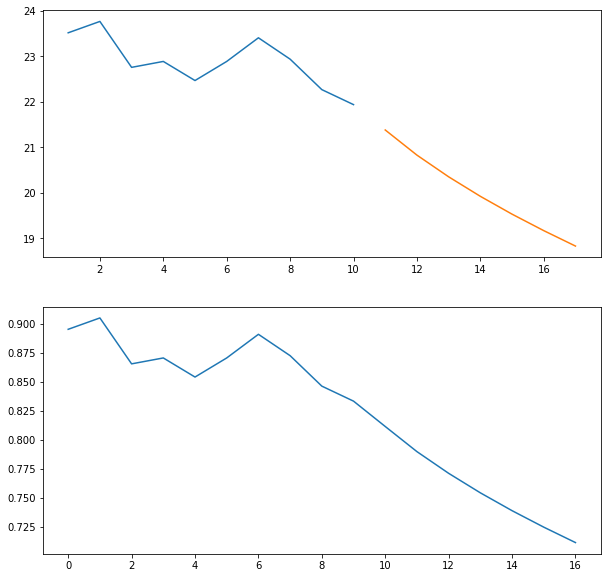

In [237]:
# needs change
day_new=np.arange(1,look_back+1)
day_pred=np.arange(look_back+1,look_back+days+1)
y=len(df4)

f, axs = plt.subplots(2,figsize=(10,10))

df_new=df4.tolist()
df_new.extend(lst_output)
axs[1].plot(df_new[y-look_back:])
# plt.plot(df_new[y-look_back:])

axs[0].plot(day_new,scaler.inverse_transform(df4[y-look_back:]))
axs[0].plot(day_pred,scaler.inverse_transform(lst_output))